# 56 Displaying Seismic Data in PyVista

The following notebooks illustrates how to display publicly available seismic data loaded with ```segysak``` and visualized using ```PyVista```.

<img src="../images/tutorial56_cover.png">

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import warnings
warnings.filterwarnings("ignore")

# import gemgis as gg

from segysak.segy import segy_loader

import numpy as np

from matplotlib.colors import ListedColormap

import matplotlib as mpl
import matplotlib.pyplot as plt

import pyvista as pv

from shapely.geometry import LineString

## Conflict between GeoPandas and Segysak

Importing ```gemgis``` and its dependencies together with ```segysak``` will result in an ```ImportError```. Therefore, please comment the ```segysak``` import, import ```gemgis```, download the data, restart the notebook, comment the gemgis import and uncomment the ```segysak``` import to continue running the notebook. 

In [2]:
file_path ='data/56_displaying_seismic_data_in_pyvista/'
# gg.download_gemgis_data.download_tutorial_data(filename="56_displaying_seismic_data_in_pyvista.zip", dirpath=file_path)

## Loading Seismic Data

The used seismic data can be freely downloaded from https://www.nlog.nl/en/scan-2d-seismic-data and https://www.nlog.nl/en/map-2d-seismic-data. It will be opened using the ```segysak``` package (https://segysak.readthedocs.io/en/latest/).

We are loading the recently acquired SCAN Seismic Line 29 as ```xarray``` object. The remaining SCAN Line 20 as well as the Seismic Lines shot within the Framework of the Californie Geothermal project will be loaded directly as vtk file for the final plotting. All data have been prepared the same way as shown here in this notebook.

In [3]:
scan29 = segy_loader(file_path+'L2EBN2020ASCAN029_PreSTM_final_full_AGC.sgy', vert_domain="TWT")
scan29


Loading as 2D


<xarray.Dataset>
Dimensions:  (cdp: 19393, twt: 5001)
Coordinates:
  * cdp      (cdp) uint16 100 101 102 103 104 ... 19488 19489 19490 19491 19492
  * twt      (twt) float64 0.0 2.0 4.0 6.0 ... 9.996e+03 9.998e+03 1e+04
    cdp_x    (cdp) float32 1.697e+05 1.697e+05 1.697e+05 ... 2.164e+05 2.164e+05
    cdp_y    (cdp) float32 3.753e+05 3.753e+05 3.753e+05 ... 3.874e+05 3.874e+05
Data variables:
    data     (cdp, twt) float32 0.0 0.03689 -0.05879 -0.3133 ... 0.0 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         2.0
    text:                C01 CLIENT: EBN              AREA: SCAN AREAS, NETHE...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         L2EBN2020ASCAN029_PreSTM_final_full_AGC.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-4.339022828226371, -3.723384707669676, -0.46175039...
    coord_scalar:        -100.0

## Converting xarray to DataFrame

The ```xarray``` datasets are converted to Pandas DataFrames using the built-in ```to_dataframe()``` function. The DataFrame contains the X and Y data for every CDP as well as the data value for every sample.

In [4]:
df_scan29 = scan29.to_dataframe()
df_scan29

data          cdp_x        cdp_y
cdp   twt                                          
100   0.0      0.000000  169653.796875  375267.0000
      2.0      0.036886  169653.796875  375267.0000
      4.0     -0.058794  169653.796875  375267.0000
      6.0     -0.313349  169653.796875  375267.0000
      8.0     -0.186058  169653.796875  375267.0000
...                 ...            ...          ...
19492 9992.0   0.000000  216394.500000  387366.1875
      9994.0   0.000000  216394.500000  387366.1875
      9996.0   0.000000  216394.500000  387366.1875
      9998.0   0.000000  216394.500000  387366.1875
      10000.0  0.000000  216394.500000  387366.1875

[96984393 rows x 3 columns]

# Define Seismic colorbar

The seismic colorbar was obtained from https://github.com/lperozzi/Seismic_colormaps/blob/master/colormaps.py and will be used to display the seismic properly in ```PyVista```. 

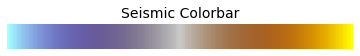

In [5]:
seismic = np.array([[0.63137255, 1.        , 1.        ],
       [0.62745098, 0.97647059, 0.99607843],
       [0.61960784, 0.95686275, 0.98823529],
       [0.61568627, 0.93333333, 0.98431373],
       [0.60784314, 0.91372549, 0.98039216],
       [0.60392157, 0.89019608, 0.97254902],
       [0.59607843, 0.87058824, 0.96862745],
       [0.59215686, 0.85098039, 0.96078431],
       [0.58431373, 0.83137255, 0.95686275],
       [0.58039216, 0.81568627, 0.94901961],
       [0.57254902, 0.79607843, 0.94117647],
       [0.56862745, 0.77647059, 0.9372549 ],
       [0.56078431, 0.76078431, 0.92941176],
       [0.55686275, 0.74509804, 0.92156863],
       [0.54901961, 0.72941176, 0.91764706],
       [0.54509804, 0.70980392, 0.90980392],
       [0.5372549 , 0.69411765, 0.90196078],
       [0.53333333, 0.68235294, 0.89803922],
       [0.5254902 , 0.66666667, 0.89019608],
       [0.52156863, 0.65098039, 0.88235294],
       [0.51372549, 0.63921569, 0.87843137],
       [0.50980392, 0.62352941, 0.87058824],
       [0.50196078, 0.61176471, 0.8627451 ],
       [0.49803922, 0.59607843, 0.85490196],
       [0.49411765, 0.58431373, 0.85098039],
       [0.48627451, 0.57254902, 0.84313725],
       [0.48235294, 0.56078431, 0.83529412],
       [0.47843137, 0.54901961, 0.82745098],
       [0.4745098 , 0.54117647, 0.82352941],
       [0.46666667, 0.52941176, 0.81568627],
       [0.4627451 , 0.51764706, 0.80784314],
       [0.45882353, 0.50980392, 0.8       ],
       [0.45490196, 0.49803922, 0.79607843],
       [0.45098039, 0.49019608, 0.78823529],
       [0.44705882, 0.48235294, 0.78039216],
       [0.44313725, 0.4745098 , 0.77254902],
       [0.43921569, 0.46666667, 0.76862745],
       [0.43529412, 0.45882353, 0.76078431],
       [0.43529412, 0.45098039, 0.75294118],
       [0.43137255, 0.44313725, 0.74901961],
       [0.42745098, 0.43529412, 0.74117647],
       [0.42352941, 0.43137255, 0.7372549 ],
       [0.42352941, 0.42352941, 0.72941176],
       [0.41960784, 0.41960784, 0.72156863],
       [0.41960784, 0.41176471, 0.71764706],
       [0.41568627, 0.40784314, 0.70980392],
       [0.41568627, 0.4       , 0.70588235],
       [0.41176471, 0.39607843, 0.69803922],
       [0.41176471, 0.39215686, 0.69411765],
       [0.41176471, 0.38823529, 0.68627451],
       [0.40784314, 0.38431373, 0.68235294],
       [0.40784314, 0.38039216, 0.67843137],
       [0.40784314, 0.38039216, 0.67058824],
       [0.40784314, 0.37647059, 0.66666667],
       [0.40784314, 0.37254902, 0.6627451 ],
       [0.40392157, 0.37254902, 0.65490196],
       [0.40392157, 0.36862745, 0.65098039],
       [0.40392157, 0.36862745, 0.64705882],
       [0.40392157, 0.36470588, 0.64313725],
       [0.40784314, 0.36470588, 0.63529412],
       [0.40784314, 0.36470588, 0.63137255],
       [0.40784314, 0.36078431, 0.62745098],
       [0.40784314, 0.36078431, 0.62352941],
       [0.40784314, 0.36078431, 0.61960784],
       [0.40784314, 0.36078431, 0.61568627],
       [0.41176471, 0.36078431, 0.61176471],
       [0.41176471, 0.36078431, 0.60784314],
       [0.41176471, 0.36470588, 0.60392157],
       [0.41568627, 0.36470588, 0.60392157],
       [0.41568627, 0.36470588, 0.6       ],
       [0.41960784, 0.36862745, 0.59607843],
       [0.41960784, 0.36862745, 0.59215686],
       [0.42352941, 0.36862745, 0.59215686],
       [0.42352941, 0.37254902, 0.58823529],
       [0.42745098, 0.37647059, 0.58431373],
       [0.43137255, 0.37647059, 0.58431373],
       [0.43137255, 0.38039216, 0.58039216],
       [0.43529412, 0.38431373, 0.58039216],
       [0.43921569, 0.38823529, 0.57647059],
       [0.44313725, 0.39215686, 0.57647059],
       [0.44705882, 0.39607843, 0.57647059],
       [0.44705882, 0.4       , 0.57254902],
       [0.45098039, 0.40392157, 0.57254902],
       [0.45490196, 0.40784314, 0.57254902],
       [0.45882353, 0.41176471, 0.57254902],
       [0.4627451 , 0.41568627, 0.57254902],
       [0.46666667, 0.41960784, 0.57254902],
       [0.47058824, 0.42745098, 0.57254902],
       [0.4745098 , 0.43137255, 0.57254902],
       [0.48235294, 0.43529412, 0.57254902],
       [0.48627451, 0.44313725, 0.57254902],
       [0.49019608, 0.44705882, 0.57254902],
       [0.49411765, 0.45490196, 0.57254902],
       [0.50196078, 0.4627451 , 0.57647059],
       [0.50588235, 0.46666667, 0.57647059],
       [0.50980392, 0.4745098 , 0.58039216],
       [0.51764706, 0.48235294, 0.58039216],
       [0.52156863, 0.49019608, 0.58431373],
       [0.52941176, 0.49803922, 0.58431373],
       [0.53333333, 0.50196078, 0.58823529],
       [0.54117647, 0.50980392, 0.59215686],
       [0.54509804, 0.51764706, 0.59607843],
       [0.55294118, 0.52941176, 0.59607843],
       [0.56078431, 0.5372549 , 0.6       ],
       [0.56862745, 0.54509804, 0.60392157],
       [0.57647059, 0.55294118, 0.61176471],
       [0.58039216, 0.56078431, 0.61568627],
       [0.58823529, 0.57254902, 0.61960784],
       [0.59607843, 0.58039216, 0.62352941],
       [0.60392157, 0.58823529, 0.63137255],
       [0.61176471, 0.6       , 0.63529412],
       [0.62352941, 0.60784314, 0.64313725],
       [0.63137255, 0.61960784, 0.64705882],
       [0.63921569, 0.62745098, 0.65490196],
       [0.64705882, 0.63921569, 0.6627451 ],
       [0.65882353, 0.65098039, 0.67058824],
       [0.66666667, 0.65882353, 0.67843137],
       [0.67843137, 0.67058824, 0.68627451],
       [0.68627451, 0.68235294, 0.69411765],
       [0.69803922, 0.69411765, 0.70196078],
       [0.70588235, 0.70588235, 0.71372549],
       [0.71764706, 0.71372549, 0.72156863],
       [0.72941176, 0.7254902 , 0.73333333],
       [0.74117647, 0.7372549 , 0.74117647],
       [0.75294118, 0.74901961, 0.75294118],
       [0.76470588, 0.76470588, 0.76470588],
       [0.77647059, 0.77647059, 0.77647059],
       [0.78823529, 0.78823529, 0.78823529],
       [0.79215686, 0.78823529, 0.78039216],
       [0.78431373, 0.77254902, 0.76078431],
       [0.77647059, 0.76078431, 0.74117647],
       [0.76862745, 0.74901961, 0.7254902 ],
       [0.76078431, 0.73333333, 0.70588235],
       [0.75294118, 0.72156863, 0.68627451],
       [0.74509804, 0.70980392, 0.67058824],
       [0.74117647, 0.69803922, 0.65490196],
       [0.73333333, 0.68627451, 0.63529412],
       [0.72941176, 0.6745098 , 0.61960784],
       [0.72156863, 0.66666667, 0.60392157],
       [0.71764706, 0.65490196, 0.58823529],
       [0.70980392, 0.64313725, 0.57254902],
       [0.70588235, 0.63137255, 0.55686275],
       [0.70196078, 0.62352941, 0.54509804],
       [0.69411765, 0.61176471, 0.52941176],
       [0.69019608, 0.60392157, 0.51372549],
       [0.68627451, 0.59215686, 0.50196078],
       [0.68235294, 0.58431373, 0.48627451],
       [0.67843137, 0.57647059, 0.4745098 ],
       [0.6745098 , 0.56470588, 0.4627451 ],
       [0.67058824, 0.55686275, 0.45098039],
       [0.66666667, 0.54901961, 0.43921569],
       [0.66666667, 0.54117647, 0.42745098],
       [0.6627451 , 0.53333333, 0.41568627],
       [0.65882353, 0.5254902 , 0.40392157],
       [0.65490196, 0.51764706, 0.39215686],
       [0.65490196, 0.50980392, 0.38039216],
       [0.65098039, 0.50196078, 0.36862745],
       [0.64705882, 0.49803922, 0.36078431],
       [0.64705882, 0.49019608, 0.34901961],
       [0.64313725, 0.48235294, 0.34117647],
       [0.64313725, 0.47843137, 0.32941176],
       [0.64313725, 0.47058824, 0.32156863],
       [0.63921569, 0.46666667, 0.31372549],
       [0.63921569, 0.45882353, 0.30196078],
       [0.63921569, 0.45490196, 0.29411765],
       [0.63529412, 0.45098039, 0.28627451],
       [0.63529412, 0.44313725, 0.27843137],
       [0.63529412, 0.43921569, 0.27058824],
       [0.63529412, 0.43529412, 0.2627451 ],
       [0.63529412, 0.43137255, 0.25490196],
       [0.63529412, 0.42745098, 0.24705882],
       [0.63529412, 0.42352941, 0.23921569],
       [0.63529412, 0.41960784, 0.23137255],
       [0.63529412, 0.41568627, 0.22745098],
       [0.63529412, 0.41176471, 0.21960784],
       [0.63529412, 0.40784314, 0.21176471],
       [0.63921569, 0.40392157, 0.20784314],
       [0.63921569, 0.40392157, 0.2       ],
       [0.63921569, 0.4       , 0.19607843],
       [0.63921569, 0.39607843, 0.18823529],
       [0.64313725, 0.39607843, 0.18431373],
       [0.64313725, 0.39607843, 0.17647059],
       [0.64705882, 0.39215686, 0.17254902],
       [0.64705882, 0.39215686, 0.16862745],
       [0.65098039, 0.38823529, 0.16078431],
       [0.65098039, 0.38823529, 0.15686275],
       [0.65490196, 0.38823529, 0.15294118],
       [0.65490196, 0.38823529, 0.14901961],
       [0.65882353, 0.38823529, 0.14117647],
       [0.6627451 , 0.38823529, 0.1372549 ],
       [0.66666667, 0.38823529, 0.13333333],
       [0.66666667, 0.38823529, 0.12941176],
       [0.67058824, 0.38823529, 0.1254902 ],
       [0.6745098 , 0.39215686, 0.12156863],
       [0.67843137, 0.39215686, 0.11764706],
       [0.68235294, 0.39215686, 0.11372549],
       [0.68627451, 0.39607843, 0.10980392],
       [0.69019608, 0.39607843, 0.10588235],
       [0.69411765, 0.4       , 0.10196078],
       [0.69803922, 0.4       , 0.09803922],
       [0.70196078, 0.40392157, 0.09411765],
       [0.70588235, 0.40784314, 0.09019608],
       [0.70980392, 0.41176471, 0.08627451],
       [0.71372549, 0.41568627, 0.08235294],
       [0.71764706, 0.41960784, 0.07843137],
       [0.7254902 , 0.42352941, 0.0745098 ],
       [0.72941176, 0.42745098, 0.07058824],
       [0.73333333, 0.43137255, 0.06666667],
       [0.7372549 , 0.43529412, 0.0627451 ],
       [0.74509804, 0.43921569, 0.05882353],
       [0.74901961, 0.44705882, 0.05882353],
       [0.75294118, 0.45098039, 0.05490196],
       [0.76078431, 0.45882353, 0.05098039],
       [0.76470588, 0.4627451 , 0.04705882],
       [0.77254902, 0.47058824, 0.04313725],
       [0.77647059, 0.47843137, 0.03921569],
       [0.78431373, 0.48627451, 0.03529412],
       [0.78823529, 0.49411765, 0.03137255],
       [0.79607843, 0.50196078, 0.02745098],
       [0.8       , 0.50980392, 0.02352941],
       [0.80784314, 0.51764706, 0.01960784],
       [0.81176471, 0.5254902 , 0.01568627],
       [0.81960784, 0.53333333, 0.01568627],
       [0.82352941, 0.54509804, 0.01176471],
       [0.83137255, 0.55294118, 0.00784314],
       [0.83921569, 0.56078431, 0.00392157],
       [0.84313725, 0.57254902, 0.00392157],
       [0.85098039, 0.58431373, 0.        ],
       [0.85490196, 0.59215686, 0.        ],
       [0.8627451 , 0.60392157, 0.        ],
       [0.86666667, 0.61568627, 0.        ],
       [0.8745098 , 0.62745098, 0.        ],
       [0.88235294, 0.63921569, 0.        ],
       [0.88627451, 0.65098039, 0.        ],
       [0.89411765, 0.6627451 , 0.        ],
       [0.89803922, 0.67843137, 0.        ],
       [0.90588235, 0.69019608, 0.        ],
       [0.91372549, 0.70196078, 0.        ],
       [0.91764706, 0.71764706, 0.        ],
       [0.9254902 , 0.73333333, 0.        ],
       [0.92941176, 0.74509804, 0.        ],
       [0.93333333, 0.76078431, 0.        ],
       [0.94117647, 0.77647059, 0.        ],
       [0.94509804, 0.79215686, 0.        ],
       [0.95294118, 0.80784314, 0.        ],
       [0.95686275, 0.82352941, 0.        ],
       [0.96078431, 0.83921569, 0.        ],
       [0.96862745, 0.85490196, 0.        ],
       [0.97254902, 0.87058824, 0.        ],
       [0.97647059, 0.89019608, 0.        ],
       [0.98039216, 0.90588235, 0.        ],
       [0.98431373, 0.9254902 , 0.        ],
       [0.98823529, 0.94509804, 0.        ],
       [0.99215686, 0.96078431, 0.        ],
       [0.99607843, 0.98039216, 0.        ],
       [1.        , 1.        , 0.        ]])

cmap_seismic = ListedColormap(seismic)


# Adapted from https://matplotlib.org/stable/tutorials/colors/colormaps.html
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(nrows=1, figsize=(6, 1));
fig.subplots_adjust(top=0.5, bottom=0.15,
                    left=0.2, right=1);
ax.set_title('Seismic Colorbar', fontsize=14);


ax.imshow(gradient, aspect='auto', cmap=cmap_seismic);

# Turn off *all* ticks & spines, not just the ones with colormaps.
ax.set_axis_off();

## Define Batlow Colorbar

The Batlow colorbar was adapted from https://github.com/callumrollo/cmcrameri/blob/master/cmcrameri/cmaps/batlow.txt-

From https://www.fabiocrameri.ch/colourmaps/:

- Fairly representing data - The colour gradients are perceptually uniform and ordered to represent data both fairly, without visual distortion, and intuitively

- Universally readable - The colour combinations are readable both by colour-vision deficient and colour-blind people, and even when printed in black&white

- Citable & reproducible - The colour maps and their diagnostics are permanently archived and versioned to enable upgrades and acknowledge  developers and contributors



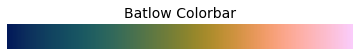

In [6]:
batlow = np.array([[0.005193,0.098238,0.349842],
[0.009065,0.104487,0.350933],
[0.012963,0.110779,0.351992],
[0.016530,0.116913,0.353070],
[0.019936,0.122985,0.354120],
[0.023189,0.129035,0.355182],
[0.026291,0.135044,0.356210],
[0.029245,0.140964,0.357239],
[0.032053,0.146774,0.358239],
[0.034853,0.152558,0.359233],
[0.037449,0.158313,0.360216],
[0.039845,0.163978,0.361187],
[0.042104,0.169557,0.362151],
[0.044069,0.175053,0.363084],
[0.045905,0.180460,0.364007],
[0.047665,0.185844,0.364915],
[0.049378,0.191076,0.365810],
[0.050795,0.196274,0.366684],
[0.052164,0.201323,0.367524],
[0.053471,0.206357,0.368370],
[0.054721,0.211234,0.369184],
[0.055928,0.216046,0.369974],
[0.057033,0.220754,0.370750],
[0.058032,0.225340,0.371509],
[0.059164,0.229842,0.372252],
[0.060167,0.234299,0.372978],
[0.061052,0.238625,0.373691],
[0.062060,0.242888,0.374386],
[0.063071,0.247085,0.375050],
[0.063982,0.251213,0.375709],
[0.064936,0.255264,0.376362],
[0.065903,0.259257,0.376987],
[0.066899,0.263188,0.377594],
[0.067921,0.267056,0.378191],
[0.069002,0.270922,0.378774],
[0.070001,0.274713,0.379342],
[0.071115,0.278497,0.379895],
[0.072192,0.282249,0.380434],
[0.073440,0.285942,0.380957],
[0.074595,0.289653,0.381452],
[0.075833,0.293321,0.381922],
[0.077136,0.296996,0.382376],
[0.078517,0.300622,0.382814],
[0.079984,0.304252,0.383224],
[0.081553,0.307858,0.383598],
[0.083082,0.311461,0.383936],
[0.084778,0.315043,0.384240],
[0.086503,0.318615,0.384506],
[0.088353,0.322167,0.384731],
[0.090281,0.325685,0.384910],
[0.092304,0.329220,0.385040],
[0.094462,0.332712,0.385116],
[0.096618,0.336161,0.385134],
[0.099015,0.339621,0.385090],
[0.101481,0.343036,0.384981],
[0.104078,0.346410,0.384801],
[0.106842,0.349774,0.384548],
[0.109695,0.353098,0.384217],
[0.112655,0.356391,0.383807],
[0.115748,0.359638,0.383310],
[0.118992,0.362849,0.382713],
[0.122320,0.366030,0.382026],
[0.125889,0.369160,0.381259],
[0.129519,0.372238,0.380378],
[0.133298,0.375282,0.379395],
[0.137212,0.378282,0.378315],
[0.141260,0.381240,0.377135],
[0.145432,0.384130,0.375840],
[0.149706,0.386975,0.374449],
[0.154073,0.389777,0.372934],
[0.158620,0.392531,0.371320],
[0.163246,0.395237,0.369609],
[0.167952,0.397889,0.367784],
[0.172788,0.400496,0.365867],
[0.177752,0.403041,0.363833],
[0.182732,0.405551,0.361714],
[0.187886,0.408003,0.359484],
[0.193050,0.410427,0.357177],
[0.198310,0.412798,0.354767],
[0.203676,0.415116,0.352253],
[0.209075,0.417412,0.349677],
[0.214555,0.419661,0.347019],
[0.220112,0.421864,0.344261],
[0.225707,0.424049,0.341459],
[0.231362,0.426197,0.338572],
[0.237075,0.428325,0.335634],
[0.242795,0.430418,0.332635],
[0.248617,0.432493,0.329571],
[0.254452,0.434529,0.326434],
[0.260320,0.436556,0.323285],
[0.266241,0.438555,0.320085],
[0.272168,0.440541,0.316831],
[0.278171,0.442524,0.313552],
[0.284175,0.444484,0.310243],
[0.290214,0.446420,0.306889],
[0.296294,0.448357,0.303509],
[0.302379,0.450282,0.300122],
[0.308517,0.452205,0.296721],
[0.314648,0.454107,0.293279],
[0.320834,0.456006,0.289841],
[0.327007,0.457900,0.286377],
[0.333235,0.459794,0.282937],
[0.339469,0.461685,0.279468],
[0.345703,0.463563,0.275998],
[0.351976,0.465440,0.272492],
[0.358277,0.467331,0.269037],
[0.364589,0.469213,0.265543],
[0.370922,0.471085,0.262064],
[0.377291,0.472952,0.258588],
[0.383675,0.474842,0.255131],
[0.390070,0.476711,0.251665],
[0.396505,0.478587,0.248212],
[0.402968,0.480466,0.244731],
[0.409455,0.482351,0.241314],
[0.415967,0.484225,0.237895],
[0.422507,0.486113,0.234493],
[0.429094,0.488011,0.231096],
[0.435714,0.489890,0.227728],
[0.442365,0.491795,0.224354],
[0.449052,0.493684,0.221074],
[0.455774,0.495585,0.217774],
[0.462539,0.497497,0.214518],
[0.469368,0.499393,0.211318],
[0.476221,0.501314,0.208148],
[0.483123,0.503216,0.205037],
[0.490081,0.505137,0.201976],
[0.497089,0.507058,0.198994],
[0.504153,0.508984,0.196118],
[0.511253,0.510898,0.193296],
[0.518425,0.512822,0.190566],
[0.525637,0.514746,0.187990],
[0.532907,0.516662,0.185497],
[0.540225,0.518584,0.183099],
[0.547599,0.520486,0.180884],
[0.555024,0.522391,0.178854],
[0.562506,0.524293,0.176964],
[0.570016,0.526186,0.175273],
[0.577582,0.528058,0.173775],
[0.585199,0.529927,0.172493],
[0.592846,0.531777,0.171449],
[0.600520,0.533605,0.170648],
[0.608240,0.535423,0.170104],
[0.615972,0.537231,0.169826],
[0.623739,0.539002,0.169814],
[0.631513,0.540752,0.170075],
[0.639301,0.542484,0.170622],
[0.647098,0.544183,0.171465],
[0.654889,0.545863,0.172603],
[0.662691,0.547503,0.174044],
[0.670477,0.549127,0.175747],
[0.678244,0.550712,0.177803],
[0.685995,0.552274,0.180056],
[0.693720,0.553797,0.182610],
[0.701421,0.555294,0.185478],
[0.709098,0.556772,0.188546],
[0.716731,0.558205,0.191851],
[0.724322,0.559628,0.195408],
[0.731878,0.561011,0.199174],
[0.739393,0.562386,0.203179],
[0.746850,0.563725,0.207375],
[0.754268,0.565033,0.211761],
[0.761629,0.566344,0.216322],
[0.768942,0.567630,0.221045],
[0.776208,0.568899,0.225930],
[0.783416,0.570162,0.230962],
[0.790568,0.571421,0.236160],
[0.797665,0.572682,0.241490],
[0.804709,0.573928,0.246955],
[0.811692,0.575187,0.252572],
[0.818610,0.576462,0.258303],
[0.825472,0.577725,0.264197],
[0.832272,0.579026,0.270211],
[0.838999,0.580339,0.276353],
[0.845657,0.581672,0.282631],
[0.852247,0.583037,0.289036],
[0.858747,0.584440,0.295572],
[0.865168,0.585882,0.302255],
[0.871505,0.587352,0.309112],
[0.877741,0.588873,0.316081],
[0.883878,0.590450,0.323195],
[0.889900,0.592087,0.330454],
[0.895809,0.593765,0.337865],
[0.901590,0.595507,0.345429],
[0.907242,0.597319,0.353142],
[0.912746,0.599191,0.360986],
[0.918103,0.601126,0.368999],
[0.923300,0.603137,0.377139],
[0.928323,0.605212,0.385404],
[0.933176,0.607369,0.393817],
[0.937850,0.609582,0.402345],
[0.942332,0.611867,0.411006],
[0.946612,0.614218,0.419767],
[0.950697,0.616649,0.428624],
[0.954574,0.619137,0.437582],
[0.958244,0.621671,0.446604],
[0.961696,0.624282,0.455702],
[0.964943,0.626934,0.464860],
[0.967983,0.629639,0.474057],
[0.970804,0.632394,0.483290],
[0.973424,0.635183,0.492547],
[0.975835,0.638012,0.501826],
[0.978052,0.640868,0.511090],
[0.980079,0.643752,0.520350],
[0.981918,0.646664,0.529602],
[0.983574,0.649590,0.538819],
[0.985066,0.652522,0.547998],
[0.986392,0.655470,0.557142],
[0.987567,0.658422,0.566226],
[0.988596,0.661378,0.575265],
[0.989496,0.664329,0.584246],
[0.990268,0.667280,0.593174],
[0.990926,0.670230,0.602031],
[0.991479,0.673165,0.610835],
[0.991935,0.676091,0.619575],
[0.992305,0.679007,0.628251],
[0.992595,0.681914,0.636869],
[0.992813,0.684815,0.645423],
[0.992967,0.687705,0.653934],
[0.993064,0.690579,0.662398],
[0.993111,0.693451,0.670810],
[0.993112,0.696314,0.679177],
[0.993074,0.699161,0.687519],
[0.993002,0.702006,0.695831],
[0.992900,0.704852,0.704114],
[0.992771,0.707689,0.712380],
[0.992619,0.710530,0.720639],
[0.992447,0.713366,0.728892],
[0.992258,0.716210,0.737146],
[0.992054,0.719049,0.745403],
[0.991837,0.721893,0.753673],
[0.991607,0.724754,0.761959],
[0.991367,0.727614,0.770270],
[0.991116,0.730489,0.778606],
[0.990855,0.733373,0.786976],
[0.990586,0.736265,0.795371],
[0.990307,0.739184,0.803810],
[0.990018,0.742102,0.812285],
[0.989720,0.745039,0.820804],
[0.989411,0.747997,0.829372],
[0.989089,0.750968,0.837979],
[0.988754,0.753949,0.846627],
[0.988406,0.756949,0.855332],
[0.988046,0.759964,0.864078],
[0.987672,0.762996,0.872864],
[0.987280,0.766047,0.881699],
[0.986868,0.769105,0.890573],
[0.986435,0.772184,0.899493],
[0.985980,0.775272,0.908448],
[0.985503,0.778378,0.917444],
[0.985002,0.781495,0.926468],
[0.984473,0.784624,0.935531],
[0.983913,0.787757,0.944626],
[0.983322,0.790905,0.953748],
[0.982703,0.794068,0.962895],
[0.982048,0.797228,0.972070],
[0.981354,0.800406,0.981267]])

cmap_batlow = ListedColormap(batlow)


# Adapted from https://matplotlib.org/stable/tutorials/colors/colormaps.html
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(nrows=1, figsize=(6, 1));
fig.subplots_adjust(top=0.5, bottom=0.15,
                    left=0.2, right=1);
ax.set_title('Batlow Colorbar', fontsize=14);


ax.imshow(gradient, aspect='auto', cmap=cmap_batlow);

# Turn off *all* ticks & spines, not just the ones with colormaps.
ax.set_axis_off();

## Selecting and reshaping the seismic data

In [7]:
cdp = 100

# Defining the number of rows
rows = int(len(df_scan29.loc[cdp]))

# Cropping the data
df_scan29_selection = df_scan29.loc[12000:]

# Defining the number of columns
columns = int(len(df_scan29_selection)/rows)

# Extract values from DataFrame
df_scan29_data = df_scan29_selection['data'].values

# Reshape data
df_scan29_data_reshaped = df_scan29_data.reshape(columns, rows)

# Selecting data only up to 2.5 s TWT
depth_twt = 2500
indices_twt = int((rows-1)/(df_scan29.loc[cdp].index.max()-df_scan29.loc[cdp].index.min())*depth_twt+1)

df_scan29_data_reshaped_selected = df_scan29_data_reshaped[:,:indices_twt]
df_scan29_data_reshaped_selected

array([[ 0.        , -0.6604564 , -0.5132353 , ...,  0.38492066,
         0.18723893, -0.3822595 ],
       [ 0.        , -0.6229209 , -0.5288663 , ...,  0.35308176,
         0.14418834, -0.46200967],
       [ 0.        , -0.58638173, -0.5448488 , ...,  0.3399232 ,
         0.09482116, -0.56471187],
       ...,
       [ 0.        ,  1.5639963 ,  1.7435122 , ...,  1.85919   ,
         1.66117   ,  0.4377218 ],
       [ 0.        ,  1.715455  ,  1.7838211 , ...,  1.9031734 ,
         1.6262188 ,  0.33231133],
       [ 0.        ,  1.8398867 ,  1.790576  , ...,  1.9389725 ,
         1.5917187 ,  0.23935503]], dtype=float32)

## Plotting Seismic Sections

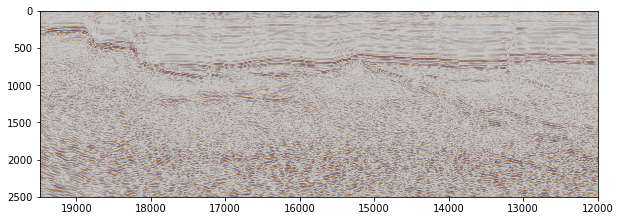

In [8]:
# Defining the extent
df_scan29_reset_index = df_scan29_selection.reset_index()
minx = df_scan29_reset_index['cdp'].min()
maxx = df_scan29_reset_index['cdp'].max()

fig, ax = plt.subplots(1, figsize=(10,10))
plt.imshow(np.fliplr(df_scan29_data_reshaped_selected.T), 
           cmap=cmap_seismic, 
           vmin=-7, 
           vmax=7, 
           extent=[maxx, 
                   minx, 
                   depth_twt,
                   df_scan29.loc[cdp].index.min()])


## Draping 2D Surface from Line 

Drape the 2D seismic data over a mesh along the seismic line. This workflow is adapted from the PyVista Tutorial at https://docs.pyvista.org/examples/00-load/create-surface-draped.html#sphx-glr-examples-00-load-create-surface-draped-py.

In [9]:
ntraces, nsamples = df_scan29_data_reshaped_selected.shape 
print(nsamples, ntraces)

1251 7493


In [10]:
sample_spacing = 2 # ms - milliseconds
sample_spacing

2

In [11]:
df_scan29_selection[['cdp_x', 'cdp_y']]

cdp_x         cdp_y
cdp   twt                                
12000 0.0      198476.09375  381918.71875
      2.0      198476.09375  381918.71875
      4.0      198476.09375  381918.71875
      6.0      198476.09375  381918.71875
      8.0      198476.09375  381918.71875
...                     ...           ...
19492 9992.0   216394.50000  387366.18750
      9994.0   216394.50000  387366.18750
      9996.0   216394.50000  387366.18750
      9998.0   216394.50000  387366.18750
      10000.0  216394.50000  387366.18750

[37472493 rows x 2 columns]

In [12]:
cdps =  np.unique(df_scan29_selection[['cdp_x', 'cdp_y']].values,axis=0)
print(len(cdps))
cdps

7493


array([[198476.1 , 381918.72],
       [198478.5 , 381919.28],
       [198480.89, 381920.  ],
       ...,
       [216389.69, 387364.72],
       [216392.1 , 387365.5 ],
       [216394.5 , 387366.2 ]], dtype=float32)

In [13]:
path = np.c_[cdps, np.zeros(len(cdps))]
path

array([[198476.09375 , 381918.71875 ,      0.      ],
       [198478.5     , 381919.28125 ,      0.      ],
       [198480.890625, 381920.      ,      0.      ],
       ...,
       [216389.6875  , 387364.71875 ,      0.      ],
       [216392.09375 , 387365.5     ,      0.      ],
       [216394.5     , 387366.1875  ,      0.      ]])

In [14]:
points = np.repeat(path, nsamples, axis=0)
points

array([[198476.09375, 381918.71875,      0.     ],
       [198476.09375, 381918.71875,      0.     ],
       [198476.09375, 381918.71875,      0.     ],
       ...,
       [216394.5    , 387366.1875 ,      0.     ],
       [216394.5    , 387366.1875 ,      0.     ],
       [216394.5    , 387366.1875 ,      0.     ]])

In [15]:
# repeat the Z locations across
tp = np.arange(0, sample_spacing * nsamples, sample_spacing)
tp = path[:, 2][:, None] - tp
points[:, -1] = tp.ravel()

## Creating Structured Grid

In [16]:
grid = pv.StructuredGrid()
grid.points = points
grid.dimensions = nsamples, ntraces, 1

# Add the data array - note the ordering!
grid["values"] = df_scan29_data_reshaped_selected.ravel(order="C")
grid

StructuredGrid (0x271084f7e20)
  N Cells:	9365000
  N Points:	9373743
  X Bounds:	1.985e+05, 2.164e+05
  Y Bounds:	3.819e+05, 3.874e+05
  Z Bounds:	-2.500e+03, 0.000e+00
  Dimensions:	1251, 7493, 1
  N Arrays:	1

## Load Remaining Meshes

In [17]:
cal01 = pv.read(file_path+'Californie_01.vtk')
cal01

StructuredGrid (0x271084f7820)
  N Cells:	1537500
  N Points:	1539981
  X Bounds:	2.015e+05, 2.086e+05
  Y Bounds:	3.752e+05, 3.851e+05
  Z Bounds:	-2.500e+03, 0.000e+00
  Dimensions:	1251, 1231, 1
  N Arrays:	1

In [18]:
cal02 = pv.read(file_path+'Californie_02.vtk')
cal02

StructuredGrid (0x2710850e160)
  N Cells:	3376250
  N Points:	3380202
  X Bounds:	1.941e+05, 2.207e+05
  Y Bounds:	3.808e+05, 3.825e+05
  Z Bounds:	-2.500e+03, 0.000e+00
  Dimensions:	1251, 2702, 1
  N Arrays:	1

In [20]:
scan20 = pv.read(file_path+'Scan_Line_20.vtk')
scan20

StructuredGrid (0x27108732820)
  N Cells:	11191250
  N Points:	11201454
  X Bounds:	2.034e+05, 2.134e+05
  Y Bounds:	3.749e+05, 3.949e+05
  Z Bounds:	-2.500e+03, 0.000e+00
  Dimensions:	1251, 8954, 1
  N Arrays:	1

In [21]:
base_tertiary = pv.read(file_path + 'Base_Tertiary.vtk')
base_tertiary

StructuredGrid (0x271086afa60)
  N Cells:	2895750
  N Points:	2899288
  X Bounds:	-4.242e+04, 2.793e+05
  Y Bounds:	3.056e+05, 8.681e+05
  Z Bounds:	-1.751e+03, 1.000e+00
  Dimensions:	2251, 1288, 1
  N Arrays:	1

In [23]:
outline_nrw_clipped = pv.read(file_path + 'Outline_NRW_Mesh.vtk')
outline_nrw_clipped

PolyData (0x2710850e1c0)
  N Cells:	966
  N Points:	968
  X Bounds:	2.062e+05, 2.134e+05
  Y Bounds:	3.700e+05, 4.000e+05
  Z Bounds:	-2.500e+03, 0.000e+00
  N Arrays:	1

In [25]:
top_dinant = pv.read(file_path + 'Top_Dinant.vtk')
top_dinant

StructuredGrid (0x27108477c40)
  N Cells:	1899920
  N Points:	1902687
  X Bounds:	-3.485e+04, 2.826e+05
  Y Bounds:	3.000e+05, 6.740e+05
  Z Bounds:	-5.122e+03, -1.322e+02
  Dimensions:	1497, 1271, 1
  N Arrays:	1

## Clipping meshes and calculating contours

In [27]:
base_tertiary_clipped = base_tertiary.clip_box([190000, 225000, 370000, 400000, -2500.0, 100.0], invert=False)
top_dinant_clipped = top_dinant.clip_box([190000, 225000, 370000, 400000, -2500.0, 100.0], invert=False)

In [28]:
base_tertiary_clipped_contours = base_tertiary_clipped.contour(np.linspace(-850, -500, 50))
base_tertiary_clipped_contours

PolyData (0x2710876f760)
  N Cells:	12771
  N Points:	12856
  X Bounds:	1.900e+05, 2.131e+05
  Y Bounds:	3.700e+05, 4.000e+05
  Z Bounds:	-8.143e+02, -5.429e+02
  N Arrays:	1

## Plotting Seismic Data and Surfaces

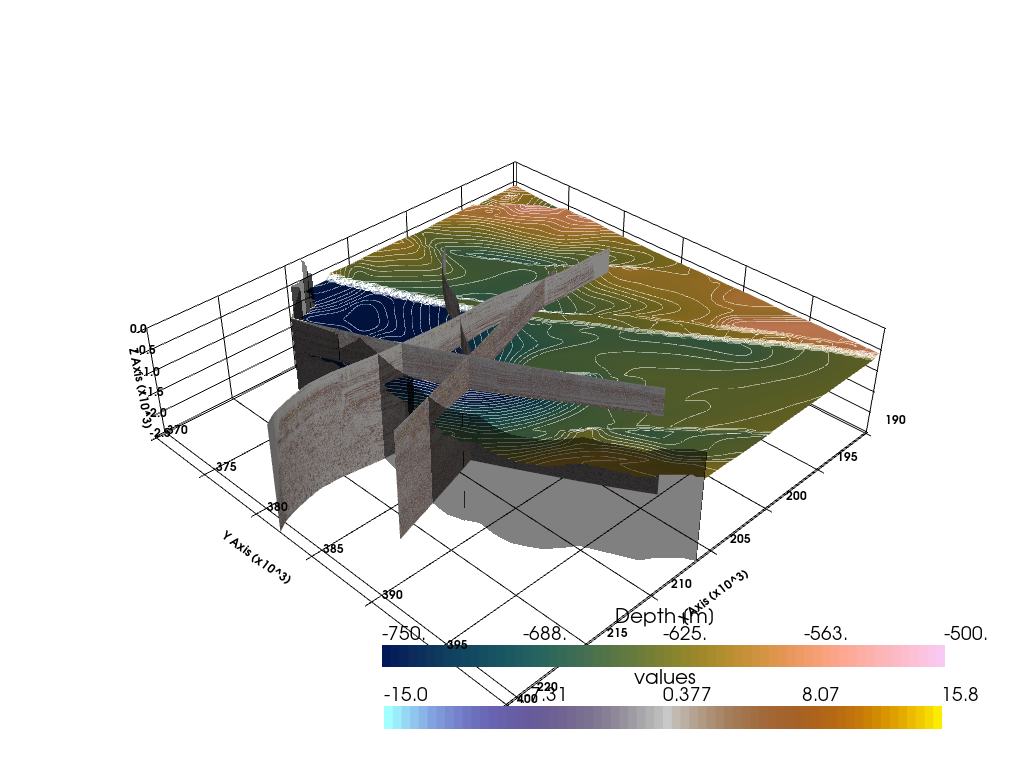

In [31]:
import pyvista as pv

sargs = dict(color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(grid, cmap=cmap_seismic,scalar_bar_args=sargs, clim=[-15,15])
p.add_mesh(cal01, cmap=cmap_seismic)
p.add_mesh(cal02, cmap=cmap_seismic)
p.add_mesh(scan20, cmap=cmap_seismic)
p.add_mesh(base_tertiary_clipped, cmap=cmap_batlow,scalar_bar_args=sargs, clim=[-750,-500])
p.add_mesh(base_tertiary_clipped_contours, color='white')
# p.add_mesh(top_dinant_clipped, cmap='viridis')
p.add_mesh(outline_nrw_clipped, color='black', opacity=0.5)
p.show_grid(color='black')
p.set_background(color='white')
p.set_scale(1,1,3)

p.show()